#Assignment 2 

## feedforward

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### 1. draw the network
[link text](https://github.com/youko70s/NeuralNets-DeepLearning/blob/master/WeChat%20Image_20191026154257.jpg)
![alt text](https://github.com/youko70s/NeuralNets-DeepLearning/blob/master/WeChat%20Image_20191026154257.jpg)


### 2. mathematical equation for the output of this network

yhat = 1/(1+e^(v1*max(0,w11*x1+w21*x2+b11)+v2*max(0,w12*x1+w22*x2+b12)+v3*max(0,w13*x1+w23*x2+b13)+b))


###3. forward-pass function in python

In [0]:
# 1 feedforward
def activate(x):
  return np.maximum(0,x)


In [0]:
# define sigmoid function since it is a binary classfication
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s


In [0]:
# create the feedforward network
def ff_nn_ReLu(x, params):
    w,v,b,c = params
    h = relu(np.dot(x, w) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y


### 4. class probabilities associaated of each sample


In [0]:
w = np.array([np.array([1,-1,0]),np.array([0,0,0.5])])
v = np.array([1,0,-1]).reshape(3,1)
b_1 = np.array([0,0,1])
b_2 = np.array([1])
x = np.array([[1,-1],[0,-1],[0,1]]).reshape(3,2)


In [229]:
ff_nn_ReLu(x,(w,v,b_1,b_2))

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

## gradient descent


### 1  

df/dx = -3x^2 - 200*(y^2-x)

df/dy = 400*(y^2-x)*y

### 2. visualizations of rosenbrock function

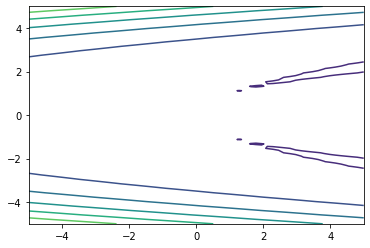

In [13]:
from scipy import *
from matplotlib.pyplot import *

rosenbrockfunction = lambda x,y: (1-x**3)+100*(y**2-x)**2

X,Y = meshgrid(linspace(-5, 5, 60), linspace(-5, 5, 50))
Z = rosenbrockfunction(X, Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
#contour(X, Y, Z, logspace(-0.5,  3.5, 20, base = 10), cmap = 'gray')
#title('Rosenbrock Function: $f(x,y) = (1-x**3)+100*(y**2-x)**2$')
#xlabel('x')
#ylabel('y')

### 3. gradient descent algo


In [0]:
# define the derivatives 
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 200*(y**2-x)
    df_dy = 400*(y**2-x)*y
    return np.array([df_dx, df_dy])


In [0]:
def my_f(x,y):
    return (1-x**3)+100*(y**2-x)**2

In [0]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)


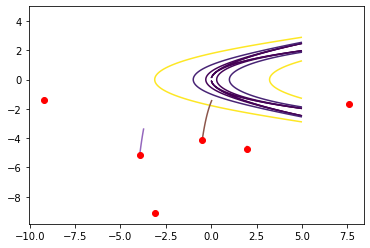

In [23]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-1,stop=3, num=5))
trajectories = []
for i in range(-10,-4):
    traj = grad_descent(iterations=50, learning_rate=10**(i))
    trajectories.append(grad_descent(iterations=50, learning_rate=10**(i)))
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-')
    plt.plot(x[0],y[0],'ro')

### 5. momentum

In [0]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, learning_rate=0.01):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + learning_rate*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

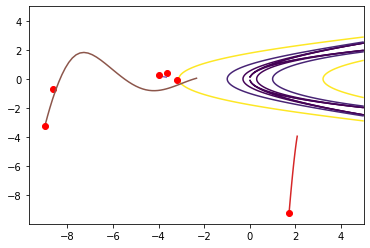

In [28]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-1,stop=3, num=5))
trajectories = []
for i in range(-10,-4):
    traj = grad_descent_with_momentum(iterations=50, learning_rate=10**(i))
    trajectories.append(grad_descent_with_momentum(iterations=50, learning_rate=10**(i)))
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-')
    plt.plot(x[0],y[0],'ro')

## 4 BACKPROP

 ### 1.
 $$ \frac{\partial l}{\partial v_i} = \frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial v_1} = (-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})h_i \\ \frac{\partial l}{\partial c} = \frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial c}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y}) \\ \frac{\partial l}{\partial w_{ji}} =\frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial w_{ji}} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j x_i \\ \text{if $w_{j1}x_1+w_{j2}x_2+b_j >0$ , else $\frac{\partial l}{\partial w_{ji}}=0$} \\ \frac{\partial l}{\partial b_j} =\frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial b_j} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j \\ \text{if $w_{j1}x_1+w_{j2}x_2+b_j >0$ , else $\frac{\partial l}{\partial b_j}=0$} \\ $$

### 2. 

In [0]:
def relu_sigma(x):
    return np.where(x>0, 1, 0)

def loss(y, y_hat):
    # cross entropy
    res = y * np.log(y_hat)
    return  -res.sum()

  
def grad_f(params,x,y):
  w,v,b,c = params
  h = activate(np.dot(x, w) + b)
  y_hat = sigmoid(np.dot(h,v) + c)
  y = y.reshape(1000,1)
  dc = (y_hat-y).sum()
  dv = h.T.dot(y_hat-y)
  db = ((y_hat-y).dot(v.T)*relu_sigma(h)).sum(axis=0)
  dw = x.T.dot((y_hat-y).dot(v.T)*relu_sigma(h))

  return (dw,dv,db,dc)

### 3. generate dateset 


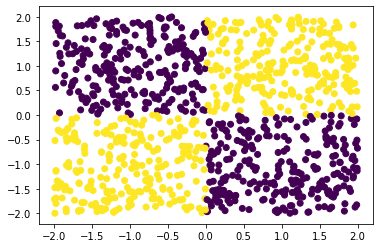

In [53]:
X = np.random.uniform(-2,2,size = (1000,2))
Y = np.zeros(1000)
Y[np.logical_and(X[:,0]>0, X[:,1]>0)] = 1
Y[np.logical_and(X[:,0]<0, X[:,1]<0)] = 1
plt.scatter(X[:,0],X[:,1],c=Y)

### 4. fit network

In [0]:
def grad_descent(x, y, starting_point, iterations=10, learning_rate=1e-2):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    for i in range(iterations):
        grads = grad_f(point, x, y)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)

w = np.random.randn(6).reshape(2,3)
v = np.random.randn(3).reshape(3,1)
b = np.random.randn(3).reshape(1,3)
c = np.random.randn(1).reshape(1,1)
params = (w,v,b,c)

In [0]:
traj, losses = grad_descent(X, Y, starting_point=params, iterations=50,learning_rate=1e-4)

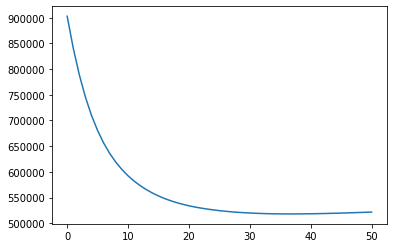

In [204]:
plt.plot(losses)


### 5. momentum

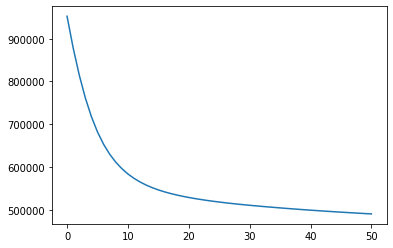

In [210]:
def grad_descent_momentum(x, y, starting_point, iterations=10, learning_rate=1e-2,alpha=0.0001):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    
    prev=None
    for i in range(iterations):
        grads = grad_f(point, x, y)
        new = []
        if not prev:
            for (p, grad) in zip(point, grads):
                new.append(p - learning_rate*grad)
        else:
            for (p, grad) in zip(point, grads):
                new.append(p - learning_rate*grad - alpha*prev)
        prev = grads
        point = tuple(new)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)

traj, losses = grad_descent(X, Y, starting_point=p_0, iterations=50,learning_rate=1e-4)
plt.plot(losses)

since the curve is more steep, it seems the model has converged more efficiently. 

### 6. plot predictions boundary

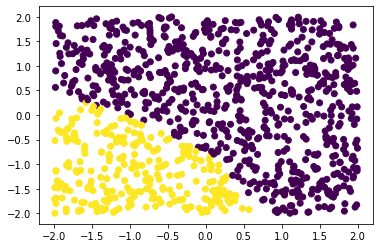

In [212]:
pred=ff_nn_ReLu(X, traj[-1])
pred[pred >=0.5] = 1
pred[pred < 0.5] = 0
plt.scatter(X[:,0],X[:,1],c=pred.reshape(1000))


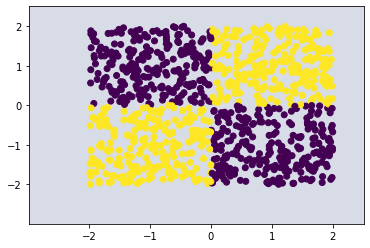

In [227]:
X_, Y_ = np.meshgrid(np.arange(min(X[:,0])-1, max(X[:,0]+1), 0.5), np.arange(min(X[:,1])-1, max(X[:,1])+1, 0.5))
input_=np.array([X_.ravel(), Y_.ravel()]).T
Z=ff_nn_ReLu(input_,params)
Z=Z>0.5
Z=Z.reshape(X_.shape)
plt.contourf(X_, Y_, Z, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(Y))